In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.potential import (
    LJ,
    DE,
)
from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH, PDB_PATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit
from ff_energy.plotting.plotting import set_style
from ff_energy.plotting.fit_results import residuals_plot, residuals_from_keys
from ff_energy.logs.logging import hide_logs
from ff_energy.ffe.potential import LJ, LJ_bound, DE

hide_logs()
import scienceplots
set_style(no_latex=True)

from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json
from ff_energy.ffe.structure import atom_key_pairs

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, \
    PKL_PATH, get_structures

from sklearn.metrics import mean_squared_error as calc_rmse


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

In [2]:
data = pd.read_pickle("/home/boittier/Documents/phd/ff_energy/pickles/water_redo_pbe0dz_mdcm.pkl")

In [3]:
data.data

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
0,10.20492,-117.64677,27.55810,test467,-1527.187866,20,-1527.328541,-88.274060,-958403.241564
1,10.99831,-117.58754,29.22768,test263,-1527.183081,20,-1527.326127,-89.762384,-958401.726960
2,11.14697,-106.83781,32.02998,test35,-1527.185703,20,-1527.300030,-71.740517,-958385.350512
3,10.64546,-106.00900,29.97665,test223,-1527.186209,20,-1527.289994,-65.125035,-958379.052942
4,10.95917,-101.29607,16.86211,test254,-1527.186066,20,-1527.331554,-91.293912,-958405.132180
...,...,...,...,...,...,...,...,...,...
495,12.11453,-101.28991,22.40034,test100,-1527.183347,20,-1527.307506,-77.910277,-958390.041931
496,11.10241,-121.80230,32.56187,test304,-1527.190149,20,-1527.335938,-91.482928,-958407.882889
497,11.10817,-85.53101,19.52537,test327,-1527.185234,20,-1527.278286,-58.390447,-958371.706595
498,12.24501,-108.02199,25.81878,test185,-1527.187380,20,-1527.319985,-83.210129,-958397.872447


In [4]:
data_ = data.data
data_.index = data_.KEY

In [5]:
structure = "water_redo"
structs, _ = get_structures(structure,
                            pdbpath=PDB_PATH / structure)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 500 500


In [6]:
data_.sort_values("intE")

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
test76,11.21111,-89.36005,11.86175,test76,-1450.824462,19,-1527.317213,-47999.431132,-958396.133272
test4,10.54938,-142.01536,27.26727,test4,-1527.185213,20,-1527.382846,-124.015319,-958437.318158
test397,9.98637,-125.40988,18.62454,test397,-1527.183434,20,-1527.373442,-119.230703,-958431.417007
test67,9.74201,-132.42521,23.40678,test67,-1527.186353,20,-1527.375924,-118.956698,-958432.974463
test151,9.41990,-134.76793,25.87094,test151,-1527.186545,20,-1527.372006,-116.377171,-958430.516032
...,...,...,...,...,...,...,...,...,...
test365,12.44999,-82.64828,15.50390,test365,-1527.183359,20,-1527.276873,-58.680177,-958370.819613
test327,11.10817,-85.53101,19.52537,test327,-1527.185234,20,-1527.278286,-58.390447,-958371.706595
test177,11.26304,-74.80186,11.94163,test177,-1527.184798,20,-1527.275996,-57.226912,-958370.269331


In [7]:
dists = {str(s.name)[:-4]: s.distances for s in structs}

struct_data = structs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

array([[<AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'ELEC'}>,
        <AxesSubplot:title={'center':'VDW'}>],
       [<AxesSubplot:title={'center':'M_ENERGY'}>,
        <AxesSubplot:title={'center':'n_monomers'}>,
        <AxesSubplot:title={'center':'C_ENERGY'}>],
       [<AxesSubplot:title={'center':'intE'}>,
        <AxesSubplot:title={'center':'C_ENERGY_kcalmol'}>,
        <AxesSubplot:>]], dtype=object)

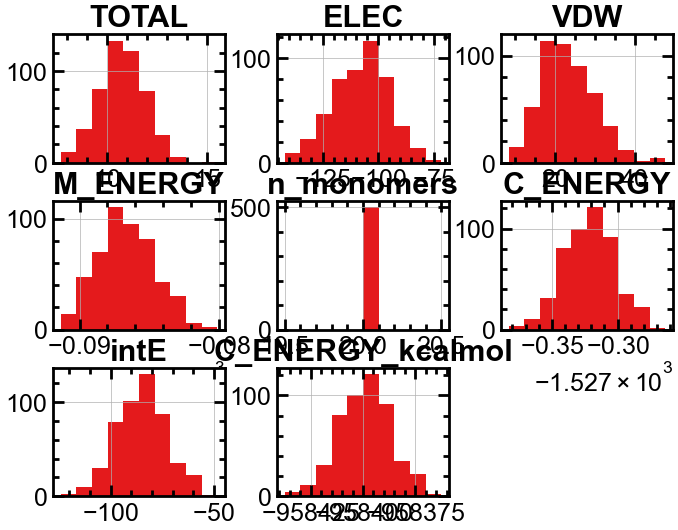

In [8]:
# dists.keys()
data_.sort_values("intE")[1:].hist()

In [9]:
ljpcff = FF(
    data_.sort_values("intE")[1:], # pd.DataFrame
    dists, #
    FUNC, #
    BOUNDS, # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(ljpcff.data)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['HT', 'OT']
Atom types: ['HT', 'OT']
Atom types: ['HT', 'OT']
Atom type pairs: [('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
setting random parameters
Getting 4 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
test0      -87.133554
test1      -76.513047
test10     -79.349417
test100    -77.910277
test101   -105.550755
              ...    
test95     -99.981490
test96     -83.650982
test97     -89.793709
test98     -85.995753
test99    -104.441875
Name: intE, Length: 499, dtype: float64
count    499.000000
mean     -84.993032
std       12.199610
min     -124.015319
25%      -93.673582
50%      -84.589632
75%      -76.703359
max      -48.367304
Name: intE, dtype: float64
HT HT
HT OT
OT OT
self.p [3.1313693706958303, 2.031084668226642, 0.12986558247774257, 0.5680705063962274]
sig [6.262738741391661, 5.162454038922473, 4.062169336453284]
ep [0.12986558247774257, 0.2716115004957858, 0.5680705063962274]
epsilons {'HT': 0.129865

In [10]:
ljpcff

FF: LJ water_redo ELEC Exact intE (jax_coloumb: False)

In [11]:
ljpcff.targets

Array([13.880295 , 32.078804 , 23.954994 , 23.379631 ,  7.9365997,
       23.38237  , 25.615452 , 19.869385 , 24.260529 , 24.50827  ,
       14.856621 , 33.42224  , 13.538841 , 30.471283 , 19.84188  ,
       19.64235  , 11.338028 , 17.92614  , 30.588684 , 25.415108 ,
       32.00811  , 16.122658 , 26.045532 , 18.426567 , 18.350124 ,
       28.157509 , 28.89367  , 21.83229  , 14.630188 , 23.964592 ,
       26.44957  , 10.600876 , 19.51455  , 23.52372  , 26.11348  ,
       31.940132 , 30.064514 , 33.823685 , 25.421883 , 32.265755 ,
       31.250664 , 25.593582 , 11.651428 ,  9.553795 , 32.051704 ,
       25.879654 , 14.413269 , 17.550812 , 19.826637 , 21.43959  ,
       22.242416 ,  7.6123276, 28.570854 , 27.42826  , 32.74054  ,
       19.823135 , 30.19915  , 15.47998  , 33.129196 , 18.390755 ,
       18.599068 , 38.17836  , 33.88701  , 18.68946  , 52.440804 ,
       19.250801 , 19.487732 , 13.880295 , 20.151344 , 22.062965 ,
       38.288612 , 18.434158 , 37.511765 , 15.491486 , 19.8697

In [12]:
ljpcff_fit = fit_repeat(ljpcff,
             2,
             "test",
             loss="jax",
            quiet=False)

loss:  jax
(<bound method FF.get_loss_jax of FF: LJ water_redo ELEC Exact intE (jax_coloumb: False)>, <bound method FF.eval_jax of FF: LJ water_redo ELEC Exact intE (jax_coloumb: False)>)
Optimizing LJ parameters...
function: get_loss_jax
bounds: [(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)]
maxfev: 10000
initial guess: [5.099766780456346, 1.2309467830890561, 0.08329341153847061, 0.055196435549258044]
final_loss_fn:  21.692020416259766
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 21.692020416259766
             x: [ 1.000e-01  1.808e+00  1.000e-01  1.000e-01]
           nit: 228
          nfev: 409
 final_simplex: (array([[ 1.000e-01,  1.808e+00,  1.000e-01,  1.000e-01],
                       [ 1.000e-01,  1.808e+00,  1.000e-01,  1.000e-01],
                       ...,
                       [ 1.000e-01,  1.808e+00,  1.000e-01,  1.000e-01],
                       [ 1.000e-01,  1.808e+00,  1.000e-01,  1.000e-01]]), 

In [13]:
pd.DataFrame(ljpcff_fit.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
0,21.692020,228,409,0,True,Optimization terminated successfully.,"[0.1, 1.8079502003612191, 0.09999999143106914,...","([[0.1, 1.8079502003612191, 0.0999999914310691..."
1,25.156588,386,670,0,True,Optimization terminated successfully.,"[1.6352994843317021, 1.1067835091773053, 0.001...","([[1.6352994843317021, 1.1067835091773053, 0.0..."


#  New structures

In [14]:
data = pd.read_pickle("/home/boittier/Documents/phd/ff_energy/pickles/water_test_pbe0dz_mdcm.pkl")
# data = pd.read_pickle("/home/boittier/Documents/phd/ff_energy/pickles/water_redo_pbe0dz_pc.pkl")

In [15]:
data_ = data.data
data_.index = data_.KEY

In [16]:
structure = "water_test"
structs, _ = get_structures(structure,
                            pdbpath=PDB_PATH / structure)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 21 21


In [17]:
data_

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
test8,12.76158,-112.89762,28.75838,test8,-1527.185935,20,-1527.322128,-85.461648,-958399.217462
test18,10.84218,-102.75874,17.58907,test18,-1527.187973,20,-1527.336863,-93.429267,-958408.463825
test13,10.85208,-104.60503,21.68685,test13,-1527.187075,20,-1527.320634,-83.808636,-958398.279715
test17,11.90407,-88.26998,20.71719,test17,-1527.186904,20,-1527.291967,-65.927379,-958380.291388
test0,10.81688,-105.15090,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538
test15,9.39469,-100.67721,16.59224,test15,-1527.187259,20,-1527.318020,-82.052976,-958396.639655
test6,10.27872,-124.95550,24.40938,test6,-1527.186791,20,-1527.345572,-99.635761,-958413.928680
test1,10.61849,-114.41182,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428
test12,8.31472,-90.66729,13.68166,test12,-1527.189014,20,-1527.314804,-78.933784,-958394.621611


In [18]:
dists = {str(s.name)[:-4]: s.distances for s in structs}

struct_data = structs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [19]:
ljpcff_test = FF(
    data_, # pd.DataFrame
    dists, #
    FUNC, #
    BOUNDS, # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff_test.num_segments = len(data_)
print("Nsegments", ljpcff_test.num_segments)
ljpcff_test.set_targets()

Atom types: ['HT', 'OT']
Atom types: ['HT', 'OT']
Atom types: ['HT', 'OT']
Atom type pairs: [('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
setting random parameters
Getting 4 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
test0    -84.637925
test1    -77.735360
test10   -95.064088
test11   -97.757619
test12   -78.933784
test13   -83.808636
test14   -71.344336
test15   -82.052976
test16   -90.358079
test17   -65.927379
test18   -93.429267
test19   -77.414951
test2    -90.019409
test20   -78.403846
test3    -91.516964
test4    -66.347298
test5    -88.904776
test6    -99.635761
test7    -74.328571
test8    -85.461648
test9    -85.440187
Name: intE, dtype: float64
count    21.000000
mean    -83.739184
std       9.593859
min     -99.635761
25%     -90.358079
50%     -84.637925
75%     -77.735360
max     -65.927379
Name: intE, dtype: float64
HT HT
HT OT
OT OT
self.p [2.648423381737106, 0.5286535033332322, 0.9616766055509932, 0.0146278496016

In [20]:
ljpcff.data["ELEC"]

KEY
test0     -101.01385
test1     -108.59185
test10    -103.30441
test100   -101.28991
test101   -113.48736
             ...    
test95    -109.13405
test96    -112.82481
test97    -116.96871
test98    -102.57042
test99    -123.46439
Name: ELEC, Length: 499, dtype: float64

In [21]:
ljpcff.eval_best_parm().to_numpy().shape

Set optimized parameters to FF object, use FF.opt_parm to get the optimized parameters
HT HT
HT OT
OT OT


(499, 1)

In [22]:
ljpcff.eval_best_parm().to_numpy().flatten() + ljpcff.data["ELEC"]

Set optimized parameters to FF object, use FF.opt_parm to get the optimized parameters
HT HT
HT OT
OT OT


KEY
test0     -81.461452
test1     -81.342020
test10    -84.892443
test100   -78.980863
test101   -96.834496
             ...    
test95    -90.603305
test96    -88.165536
test97    -90.579163
test98    -85.130014
test99    -96.126768
Name: ELEC, Length: 499, dtype: float64

In [23]:
ffeval = ljpcff_test.eval_jax(ljpcff.get_best_parm())[0]

Set optimized parameters to FF object, use FF.opt_parm to get the optimized parameters
HT HT
HT OT
OT OT


Text(0, 0.5, 'FF ENERGY [kcal/mol]')

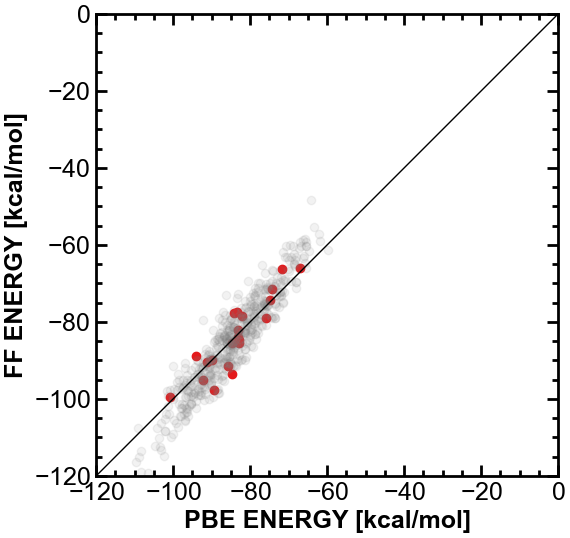

In [24]:
plt.scatter(ffeval + ljpcff_test.data["ELEC"], ljpcff_test.targets + ljpcff_test.data["ELEC"])
plt.scatter(ljpcff.eval_best_parm().to_numpy().flatten() + ljpcff.data["ELEC"], ljpcff.targets + ljpcff.data["ELEC"] , alpha=0.1, color="gray")

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")


In [25]:
ljpcff.get_best_parm()

array([0.1       , 1.8079502 , 0.09999999, 0.1       ])

In [26]:
ljpcff.get_loss_grad(ljpcff.get_best_parm())

Array([ -2.9396522,   0.7091389,  -4.649633 , -25.337648 ], dtype=float32)

In [29]:
from scipy.optimize import minimize

In [30]:
LJ_bound

[(0.05, 4.0), (0.05, 4.0), (1e-05, 1.0), (1e-05, 1.0)]

In [31]:
ljpcff.get_best_parm()

array([0.1       , 1.8079502 , 0.09999999, 0.1       ])

In [43]:
minimize(ljpcff.get_loss_jax, [ 1.635e+00 , 1.107e+00 , 1.000e-03 , 1.000e-01], method='TNC', 
         jac=ljpcff.get_loss_grad, 
         bounds=[(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)],
         options={"maxfun":1000, "ftol": 10*-10},
        )

# method=’L-BFGS-B’


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 24.84539031982422
       x: [ 1.623e+00  1.291e+00  1.000e-03  1.917e-02]
     nit: 94
     jac: [-2.693e-01 -1.214e-01  6.689e+01  2.022e+00]
    nfev: 718

In [25]:
# a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])
# a,b,c = ljpcff.eval_jax([ 0.1, 0.1, 0.36058475, 1.74046017,])

In [26]:
np.sqrt(calc_rmse(
ffeval + ljpcff_test.data["ELEC"], ljpcff_test.targets + ljpcff_test.data["ELEC"]
))

4.1254735

In [27]:
np.sqrt(calc_rmse(
ffeval + ljpcff_test.data["ELEC"], ljpcff_test.data["intE"]
))

4.125473563737779

In [28]:
np.std((ffeval+ ljpcff_test.data["ELEC"]) - (ljpcff_test.targets+ ljpcff_test.data["ELEC"]))

4.121791

In [29]:
np.sqrt(calc_rmse(
ljpcff.eval_best_parm().to_numpy().flatten() + ljpcff.data["ELEC"], ljpcff.data["intE"]
))

Set optimized parameters to FF object, use FF.opt_parm to get the optimized parameters
HT HT
HT OT
OT OT


4.635384094587157

In [30]:
np.std((ljpcff.eval_best_parm().to_numpy().flatten() + ljpcff.data["ELEC"]) -  ljpcff.data["intE"])

Set optimized parameters to FF object, use FF.opt_parm to get the optimized parameters
HT HT
HT OT
OT OT


4.633609804111226

In [20]:
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT

In [21]:
# tip3
a,b,c = ljpcff.eval_jax([ 
        0.2245,
        1.7682, 
        0.0460, 
        0.1521, 
])
a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])

In [22]:
a

Array([ 9.251455 , 14.777982 , 10.30091  ,  8.400745 ,  4.299672 ,
       10.247934 , 10.167942 ,  5.652323 , 11.281921 ,  7.8529425,
        6.4905353, 12.583264 ,  9.460383 , 11.551605 , 10.802073 ,
        3.6021059, 17.105726 , 11.182094 ,  5.8501616, 13.645883 ,
        9.839243 ], dtype=float32)

In [23]:
a_,b_,c_ = FFOBJ.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])

In [24]:
# ljpcff.data

(array([2., 0., 1., 4., 4., 4., 3., 1., 1., 1.]),
 array([-17.826645 , -15.245747 , -12.664848 , -10.08395  ,  -7.5030518,
         -4.9221535,  -2.3412552,   0.2396431,   2.8205414,   5.4014397,
          7.982338 ], dtype=float32),
 <BarContainer object of 10 artists>)

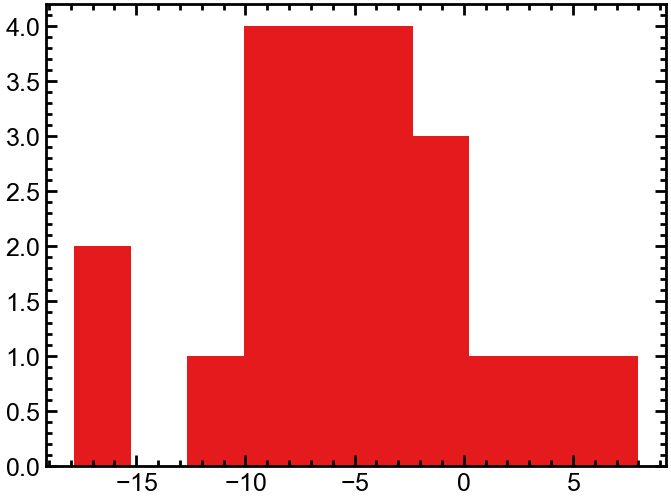

In [25]:
plt.hist(ljpcff.targets)

In [26]:
datacopy = ljpcff.data.copy()
datacopy["fitE"] = a
datacopy["target"] = ljpcff.targets
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538,0.0,9.251455,-8.164207
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428,0.0,14.777982,7.982338
test10,10.09662,-89.77506,24.00860,test10,-1527.187550,20,-1527.339045,-95.064088,-958409.833043,0.0,10.300910,-5.289024
test11,9.97533,-79.93098,20.57407,test11,-1527.188313,20,-1527.344101,-97.757619,-958413.005378,0.0,8.400745,-17.826645
test12,8.69738,-67.91695,13.68166,test12,-1527.189014,20,-1527.314804,-78.933784,-958394.621611,0.0,4.299672,-11.016838
test13,10.93537,-79.04137,21.68685,test13,-1527.187075,20,-1527.320634,-83.808636,-958398.279715,0.0,10.247934,-4.767265
test14,10.62310,-71.58025,24.96655,test14,-1527.189420,20,-1527.303115,-71.344336,-958387.286722,0.0,10.167942,0.235916
test15,9.56544,-72.30831,16.59224,test15,-1527.187259,20,-1527.318020,-82.052976,-958396.639655,0.0,5.652323,-9.744667
test16,12.68634,-86.58325,25.73819,test16,-1527.184128,20,-1527.328125,-90.358079,-958402.980158,0.0,11.281921,-3.774826


In [27]:
datacopy = datacopy.loc[ ["test0",
"test1",
"test2",
"test3",
"test4",
"test5",
"test6",
"test7",
"test8",
"test9",
"test10",
"test11",
"test12",
"test13",
"test14",
"test15",
"test16",
"test17",
"test18",
"test19",]]
datacopy["EPOL"] = polE

In [28]:
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target,EPOL
KEY,,,,,,,,,,,,,
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538,0.0,9.251455,-8.164207,-13.711463
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428,0.0,14.777982,7.982338,-13.113444
test2,10.62982,-86.03509,21.05558,test2,-1527.187648,20,-1527.331104,-90.019409,-958404.850004,0.0,9.460383,-3.984322,-12.595535
test3,10.46860,-83.35005,24.12367,test3,-1527.188524,20,-1527.334367,-91.516964,-958406.897045,0.0,10.802073,-8.166908,-14.095311
test4,11.90133,-61.08977,13.29071,test4,-1527.183458,20,-1527.289190,-66.347298,-958378.548486,0.0,3.602106,-5.257526,-7.846198
test5,10.60922,-87.64687,32.48558,test5,-1527.188095,20,-1527.329776,-88.904776,-958404.016178,0.0,17.105726,-1.257904,-12.722443
test6,10.11763,-93.13948,24.40938,test6,-1527.186791,20,-1527.345572,-99.635761,-958413.928680,0.0,11.182094,-6.496277,-15.185254
test7,11.02849,-65.37872,16.73097,test7,-1527.185562,20,-1527.304014,-74.328571,-958387.850459,0.0,5.850162,-8.949844,-10.552431
test8,12.60002,-85.75712,28.75838,test8,-1527.185935,20,-1527.322128,-85.461648,-958399.217462,0.0,13.645883,0.295471,-16.058389


In [29]:
np.sqrt(calc_rmse(
    ljpcff.data.intE,
    a + ljpcff.data.ELEC
))

15.590667359517822

In [36]:
np.std(ljpcff.data.intE
    - (a + ljpcff.data.ELEC))

4.345984816189061

In [30]:
np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ELEC + datacopy.EPOL
))

4.606499708645817

In [31]:
np.sqrt(calc_rmse(FFOBJ.data.intE, a_ + FFOBJ.data.ELEC))

5.655035133460915

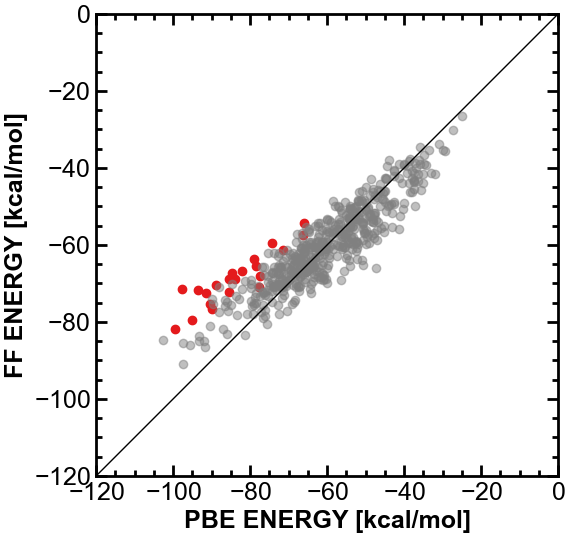

In [32]:
plt.scatter(
            ljpcff.data.intE,
            a + ljpcff.data.ELEC, 
           )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELEC,  c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pc_test.png")

In [199]:
datacopy.ELEC + datacopy.EPOL

KEY
test0     -90.185183
test1     -98.831144
test2     -98.630625
test3     -97.445361
test4     -68.935968
test5    -100.369313
test6    -108.324734
test7     -75.931151
test8    -101.815509
test9     -92.246431
test10   -105.932221
test11    -94.888240
test12    -80.167325
test13    -91.430018
test14    -83.876379
test15    -83.656513
test16   -100.168548
test17    -72.367368
test18    -91.562326
test19    -95.744461
dtype: float64

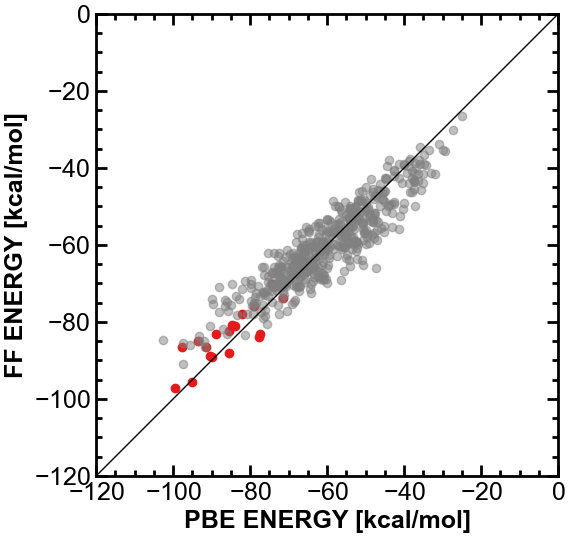

In [200]:
plt.scatter(datacopy.intE,
    datacopy.fitE + datacopy.ELEC + datacopy.EPOL
            )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELEC, c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pc_pol_test.png")